## Set WD

In [1]:
import os
os.chdir("/home/sgf2/DBMI_server/adversarial_attacks/melanoma/")

FileNotFoundError: [Errno 2] No such file or directory: '/home/sgf2/DBMI_server/adversarial_attacks/melanoma/'

In [7]:
import scipy.stats as st
from tensorflow import keras 
from sklearn import metrics
from sklearn.metrics import auc

def mean_ci(x):
    mn = np.mean(x)
    ci = st.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=st.sem(x))
    return (mn, ci[0], ci[1])

def printResults(model_preds, y_test):
    acc = np.mean(np.round(model_preds)[:,0] == y_test[:,0])
    print('Test accuracy: %0.4f' % acc)

    fpr, tpr, thresholds = metrics.roc_curve(y_test[:,1], model_preds[:,1])
    auc_score = auc(fpr,tpr)
    print('AUC: %0.4f' % auc_score)

    conf = mean_ci(np.max(model_preds, axis = 1))
    print('Avg. Confidence: ' + '{0:.6f} '.format(conf[0]) + \
          '({0:.6f}'.format(conf[1]) + ' - {0:.6f})'.format(conf[2]))

## Set up

In [8]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
from craft_attack_patch import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Adversarial Patch Attack

## Train Patches

In [9]:
# Hyperparameters
epochs = 7
learning_rate = 5.0

# Load the models
resnet1 = ModelContainer('resnet1')
resnet2 = ModelContainer('resnet2')

# White Box
model = resnet1

Finished loading resnet1, took 11s
Finished loading resnet2, took 11s


In [10]:
# Target 0
train(model, target_label=0, epochs=epochs, learning_rate=learning_rate)
file_name = './patches/resnet1_patch_target0_epoch' + str(epochs) + '_wb.npy'
np.save(file_name, model.patch())

# Target 1
train(model, target_label=1, epochs=epochs, learning_rate=learning_rate)
file_name = './patches/resnet1_patch_target1_epoch' + str(epochs) + '_wb.npy'
np.save(file_name, model.patch())

# Black Box
model = resnet2

# Target 0
train(model, target_label=0, epochs=epochs, learning_rate=learning_rate)
file_name = './patches/resnet1_patch_target0_epoch' + str(epochs) + '_bb.npy'
np.save(file_name, model.patch())

# Target 1
train(model, target_label=1, epochs=epochs, learning_rate=learning_rate)
file_name = './patches/resnet1_patch_target1_epoch' + str(epochs) + '_bb.npy'
np.save(file_name, model.patch())

(minibatch 0) loss: 0.09089552
(minibatch 1) loss: 0.04834336
Loss after epoch 0: 0.06961943954229355
(minibatch 0) loss: 0.042297546
(minibatch 1) loss: 0.054834783
Loss after epoch 1: 0.04856616444885731
(minibatch 0) loss: 0.03301487
(minibatch 1) loss: 0.01606087
Loss after epoch 2: 0.024537870660424232
(minibatch 0) loss: 0.032365326
(minibatch 1) loss: 0.016001925
Loss after epoch 3: 0.024183625355362892
(minibatch 0) loss: 0.02520809
(minibatch 1) loss: 0.021076325
Loss after epoch 4: 0.02314220741391182
(minibatch 0) loss: 0.013268396
(minibatch 1) loss: 0.040398058
Loss after epoch 5: 0.026833226904273033
(minibatch 0) loss: 0.034058407
(minibatch 1) loss: 0.023257345
Loss after epoch 6: 0.028657875955104828
(minibatch 0) loss: 3.202383
(minibatch 1) loss: 4.2947574
Loss after epoch 0: 3.748570203781128
(minibatch 0) loss: 2.256537
(minibatch 1) loss: 2.4110088
Loss after epoch 1: 2.333772897720337
(minibatch 0) loss: 1.3089297
(minibatch 1) loss: 1.5548975
Loss after epoch 2:

## Display Results

In [13]:
image_loader.X_test

array([[[[-0.47450978, -0.4980392 , -0.44313723],
         [-0.47450978, -0.4980392 , -0.44313723],
         [-0.372549  , -0.3960784 , -0.34117645],
         ...,
         [-0.12156862, -0.06666666, -0.01960784],
         [-0.1372549 , -0.09803921, -0.0745098 ],
         [-0.09019607, -0.08235294, -0.06666666]],

        [[-0.45098037, -0.47450978, -0.41960782],
         [-0.3960784 , -0.41960782, -0.36470586],
         [-0.36470586, -0.38823527, -0.3333333 ],
         ...,
         [-0.06666666, -0.01176471,  0.03529418],
         [-0.0745098 , -0.04313725, -0.01960784],
         [-0.06666666, -0.05882353, -0.04313725]],

        [[-0.41960782, -0.44313723, -0.38823527],
         [-0.372549  , -0.3960784 , -0.34117645],
         [-0.34117645, -0.36470586, -0.3098039 ],
         ...,
         [-0.05882353,  0.00392163,  0.02745104],
         [-0.06666666, -0.03529412, -0.01176471],
         [-0.04313725, -0.03529412, -0.01960784]],

        ...,

        [[-0.10588235, -0.12156862, -0

In [14]:
len(image_loader.X_test)

16

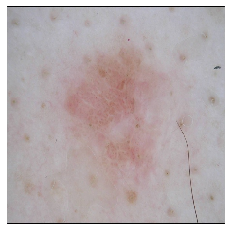

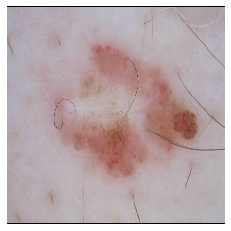

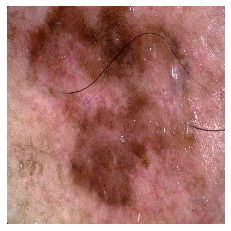

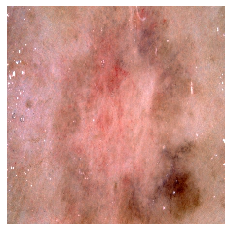

In [17]:
################################# THIS IS THE ONLY CELL THAT WAS ADDED #############
# Pick the images to show (attack). Here I randomly chose 2 from each class
show(image_loader.X_test[3]) # label 0
show(image_loader.X_test[5]) # label 0 
show(image_loader.X_test[15]) # label 1
show(image_loader.X_test[10]) # label 1

In [18]:
################################# THIS IS THE ONLY CELL THAT WAS MODIFIED #############
epochs = 7
# Load the models
resnet1 = ModelContainer('resnet1')
resnet2 = ModelContainer('resnet2')

# Loading the patch file 
resnet1_patch_target1_wb = np.load('./patches/resnet1_patch_target1_epoch' + str(epochs) + '_wb.npy')
resnet1_patch_target0_wb = np.load('./patches/resnet1_patch_target0_epoch' + str(epochs) + '_wb.npy')

Finished loading resnet1, took 12s
Finished loading resnet2, took 14s


8   [ 8  9 10 11 12 13 14 15]   [8]


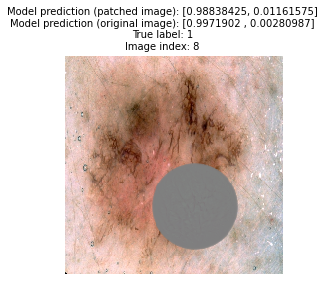

0   [0 1 2 3 4 5 6 7]   [0]


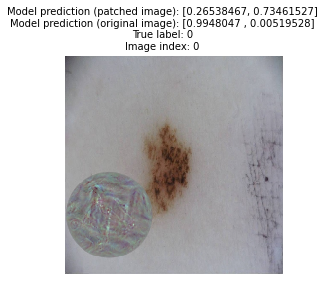

White Box:
Test accuracy: 0.0000
AUC: 0.0000
Avg. Confidence: 0.904076 (0.829277 - 0.978875)


In [26]:
# Indices of images to show (use n_show=0 when using show_indices feature)
show_indices0 = [8] # attack with target label 0
show_indices1 = [0]

# Apply
scale = 0.4
probs_patched_images, probs_original_images,indices, true_labels, winp = attack_combined(resnet1,patch_for_0=resnet1_patch_target0_wb,
                                                                         patch_for_1=resnet1_patch_target1_wb,
                                                                         n_show=0, scale=scale,
                                                                         show_indices0=show_indices0,
                                                                         show_indices1=show_indices1,
                                                                         predict_original=False
                                                                                        )


# Print
print("White Box:")
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))


8   [ 8  9 10 11 12 13 14 15]   [8]


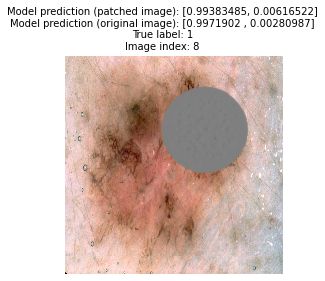

0   [0 1 2 3 4 5 6 7]   [0]


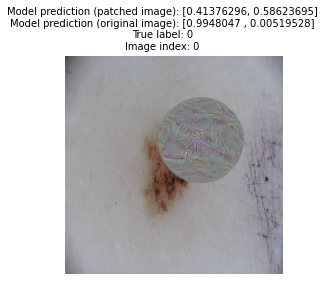


Black Box:
Test accuracy: 0.1250
AUC: 0.0000
Avg. Confidence: 0.866488 (0.779957 - 0.953018)


In [27]:
# Loading the patch file 
resnet1_patch_target1_bb = np.load('./patches/resnet1_patch_target1_epoch7_bb.npy')
resnet1_patch_target0_bb = np.load('./patches/resnet1_patch_target0_epoch7_bb.npy')

# Apply
probs_patched_images, probs_original_images, indices, true_labels, winp = attack_combined(resnet1,patch_for_0=resnet1_patch_target0_bb,
                                                                         patch_for_1=resnet1_patch_target1_bb,
                                                                         n_show=0, scale=scale,
                                                                         show_indices0=show_indices0,
                                                                         show_indices1=show_indices1,
                                                                         predict_original=False
                                                                                        )
# Print
print("\nBlack Box:")
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))

# Photoshop Patch Attacks

In [28]:
# Combined attack with mole-patches
file_name0 = './patches/natural_patch_min_p.npy'
file_name1 = './patches/natural_patch_max_p.npy'
mole_patch0 = np.load(file_name0)
mole_patch1 = np.load(file_name1)
scale = 0.4
probs_patched_images, probs_original_images, indices, true_labels, winp = attack_combined(resnet1,patch_for_0=mole_patch0,
                                                                         patch_for_1=mole_patch1,
                                                                         n_show=0, scale=scale,
                                                                         show_indices0=show_indices0,
                                                                         show_indices1=show_indices1,
                                                                         predict_original=False
                                                                                        )
printResults(probs_patched_images, keras.utils.to_categorical(true_labels))

FileNotFoundError: [Errno 2] No such file or directory: './patches/natural_patch_min_p.npy'

## Display just patch

In [29]:
import numpy as np
resnet1_patch_target1_bb = np.load('./patches/resnet1_patch_target1_epoch7_bb.npy')
resnet1_patch_target0_bb = np.load('./patches/resnet1_patch_target0_epoch7_bb.npy')
nat_min = './patches/natural_patch_min_p.npy'
nat_max = './patches/natural_patch_max_p.npy'

In [19]:
from copy import copy
def deprocess_inception(y):
    x = copy(y).astype(np.float)
    x += 1.
    x /= 2.
    #x *= 255.
    return x

import matplotlib.pyplot as plt
img = plt.imshow(deprocess_inception(resnet1_patch_target1_bb))
img.set_cmap('hot')
plt.axis('off')
plt.show()

img = plt.imshow(deprocess_inception(resnet1_patch_target0_bb))
img.set_cmap('hot')
plt.axis('off')
plt.show()

# img = plt.imshow(deprocess_inception(np.load(nat_min)))
# img.set_cmap('hot')
# plt.axis('off')
# plt.show()

# img = plt.imshow(deprocess_inception(np.load(nat_max)))
# img.set_cmap('hot')
# plt.axis('off')
# plt.show()

NameError: name 'resnet1_patch_target1_bb' is not defined